<a href="https://colab.research.google.com/github/Jhonnety/big_data/blob/main/visualizacion_datos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#listas, diccionarios, directores, arreglos
import pandas as pd
#pandas manejo de data frame
import matplotlib.pyplot as plt
import seaborn as sns
#seaborn librearia para realizar graficos a partir de data frames

Lectura del dataset

In [ ]:
df = pd.read_csv("./properties.csv")

In [ ]:
df.head()
#.head()  vista previa de los datos

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price_USD
0,Argentina,Capital Federal,Villa Crespo,Departamento,2.0,1.0,1.0,37.0,85000.0
1,Argentina,Capital Federal,Palermo,Departamento,6.0,4.0,4.0,300.0,1590000.0
2,Colombia,Atlántico,Barranquilla,Apartamento,3.0,3.0,3.0,95.0,85329.0
3,Colombia,Valle del Cauca,Cali,Apartamento,3.0,3.0,1.0,60.0,22846.0
4,Argentina,Capital Federal,Balvanera,Departamento,3.0,2.0,1.0,45.0,80000.0


In [ ]:
df.info()
#show the type of the data/variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pais                    25660 non-null  object 
 1   provincia_departamento  25660 non-null  object 
 2   ciudad                  25660 non-null  object 
 3   property_type           25660 non-null  object 
 4   rooms                   25660 non-null  float64
 5   bedrooms                25660 non-null  float64
 6   bathrooms               25660 non-null  float64
 7   surface_total           25660 non-null  float64
 8   price_USD               25660 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.8+ MB


Cambiar la tipologia de datos

In [ ]:
df['pais'] = df['pais'].astype("category")
df['provincia_departamento'] = df['provincia_departamento'].astype("category")
df['ciudad'] = df['ciudad'].astype("category")
df['property_type'] = df['property_type'].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   pais                    25660 non-null  category
 1   provincia_departamento  25660 non-null  category
 2   ciudad                  25660 non-null  category
 3   property_type           25660 non-null  category
 4   rooms                   25660 non-null  float64 
 5   bedrooms                25660 non-null  float64 
 6   bathrooms               25660 non-null  float64 
 7   surface_total           25660 non-null  float64 
 8   price_USD               25660 non-null  float64 
dtypes: category(4), float64(5)
memory usage: 1.1 MB


Analisis univariado --> tomamos variable por variable y miramos que informacion arroja esto

Cuantas propiedades hay por pais?

In [ ]:
df['pais'].value_counts()

Argentina    16892
Colombia      8768
Name: pais, dtype: int64

<Axes: xlabel='pais', ylabel='count'>

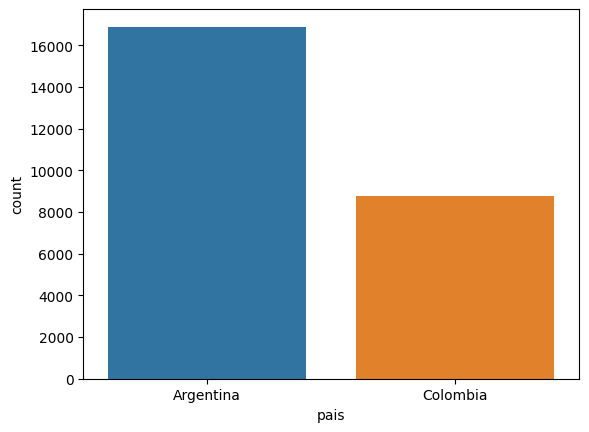

In [ ]:
sns.countplot(x=df["pais"])

In [ ]:
dfColombia = df[df['pais']  == "Colombia"]
#Mascaras

In [ ]:
dfArgentina = df[df['pais']  == "Argentina"]

In [ ]:
dfColombia.head()

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price_USD
2,Colombia,Atlántico,Barranquilla,Apartamento,3.0,3.0,3.0,95.0,85329.0
3,Colombia,Valle del Cauca,Cali,Apartamento,3.0,3.0,1.0,60.0,22846.0
5,Colombia,Santander,Floridablanca,Apartamento,3.0,3.0,2.0,75.0,60556.0
8,Colombia,Cundinamarca,Bogotá D.C,Apartamento,3.0,3.0,2.0,93.0,115607.0
12,Colombia,Risaralda,Pereira,Apartamento,3.0,3.0,3.0,121.0,96339.0


Cual es la ciudad que tiene mas registrada en la base de datos de colombia

In [ ]:
dfColombia['ciudad'].value_counts()
#Mayores ciudades de colombia

Bogotá D.C       3131
Cali             1687
Barranquilla     1410
Medellín          689
Envigado          411
                 ... 
Luján               0
Luján de Cuyo       0
Lácar               0
Maipú               0
Mendoza             0
Name: ciudad, Length: 248, dtype: int64

R/= Bogota con 3131

In [ ]:
dfArgentina['ciudad'].value_counts()
#Mayores ciudades de Argentina

Rosario          1797
Mar del Plata    1725
Palermo          1378
Recoleta          921
Almagro           737
                 ... 
Pereira             0
Palmira             0
Copacabana          0
Cota                0
Zipaquirá           0
Name: ciudad, Length: 248, dtype: int64

¿Como se distribuye la superficie?
bins
Un histograma me permite ver commo se distribuyen nuestras variables
Bins = Intervalos en los que divide nuestra variable de estudio, en este ejemplo 10
hue = parametro o variable categorico


<Axes: xlabel='surface_total', ylabel='Count'>

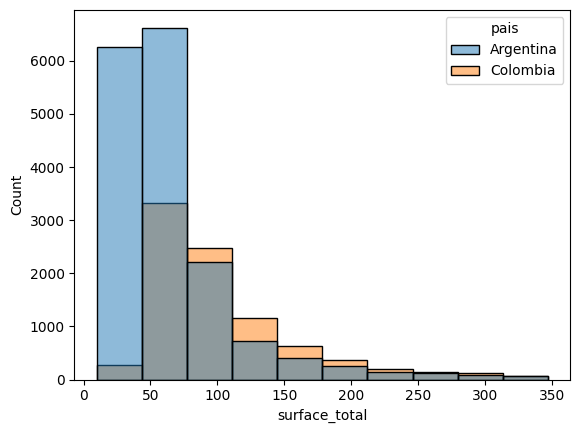

In [ ]:
sns.histplot(data=df, x= df['surface_total'], bins=10, hue="pais")


Bastante parecido el comportamiento, solo cambia bastante en el primer bin

¿Como se distribuye el precio de las propiedades diferenciadas por el pais?

<Axes: xlabel='price_USD', ylabel='Count'>

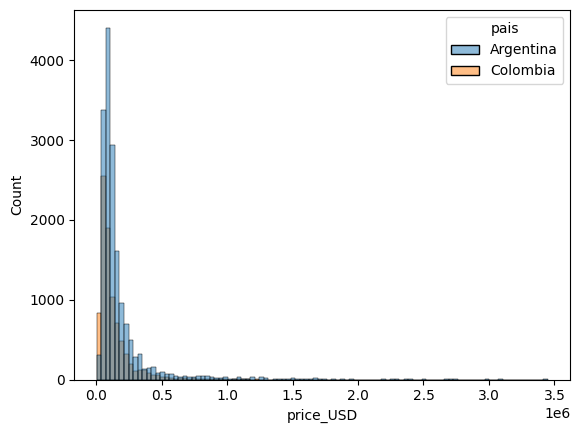

In [ ]:
sns.histplot(data=df, x= df['price_USD'], bins=100, hue="pais", alpha=0.5)

<Axes: ylabel='rooms'>

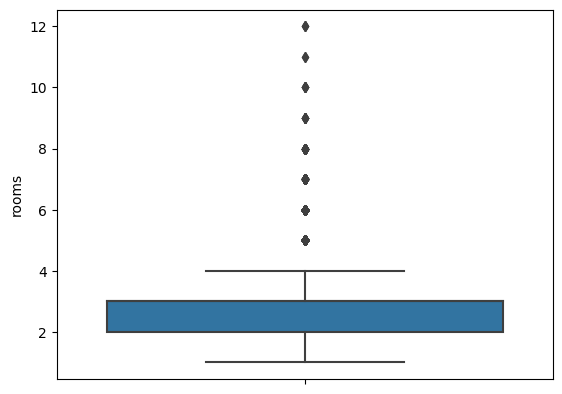

In [ ]:
sns.boxplot(data=df, y= df['rooms'])

In [ ]:
df.describe()


,rooms,bedrooms,bathrooms,surface_total,price_USD
count,25660.000000,25660.000000,25660.000000,25660.000000,2.566000e+04
mean,2.648207,1.989751,1.682502,78.966875,1.656802e+05
std,1.022895,0.937260,0.895758,53.229903,2.244543e+05
min,1.000000,1.000000,1.000000,10.000000,6.009000e+03
25%,2.000000,1.000000,1.000000,43.000000,7.100000e+04
50%,3.000000,2.000000,1.000000,63.000000,1.050000e+05
75%,3.000000,3.000000,2.000000,94.000000,1.700000e+05
max,12.000000,7.000000,6.000000,347.000000,3.450000e+06


mean(promedio) std(desviacion estandar) 25(Q1) 50(Q2) 75(Q3)

Analisi bivariado

¿En general, en que pais las propiedades son en promedio mas costosas?

In [ ]:
pv = pd.pivot_table(df, index="pais", values="price_USD", aggfunc=["mean"])
pv

,mean
,price_USD
pais,
Argentina,183746.825302
Colombia,130873.891309


In [ ]:
#tabla pibote
pv = pd.pivot_table(dfColombia, index="pais", values="price_USD", aggfunc=["mean"], columns=['ciudad'])
pv

mean                                                         \
ciudad   Abejorral   Acacías Agua de Dios Anapoima       Armenia  Barbosa   
pais                                                                        
Colombia   89458.0  123865.0     159648.0  57803.0  49351.146341  48858.0   

                                                                     ...  \
ciudad   Barrancabermeja  Barranquilla         Bello     Bogotá D.C  ...   
pais                                                                 ...   
Colombia         32067.0  99205.938298  58125.799419  201068.772916  ...   

                                                                           \
ciudad          Soacha       Soledad     Sopó    Tabio Tocancipá    Tuluá   
pais                                                                        
Colombia  30186.266667  34334.526316  83953.0  66061.0   48170.0  15965.0   

                                                          
ciudad       Tunja Villa del Rosario    Yumbo  Zipaquirá  
pais                                                      
Colombia  75695.25           33719.0  36670.0  51469.125  

[1 rows x 75 columns]

Se relaciona la superfie con el precio=

En promedio las propiedades de ARG valen mas que las de colombia!

<Axes: xlabel='surface_total', ylabel='price_USD'>

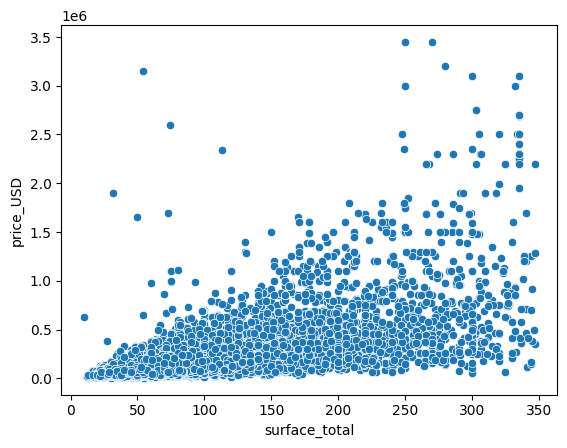

In [ ]:
sns.scatterplot(df, x="surface_total", y="price_USD")

<Axes: xlabel='surface_total', ylabel='price_USD'>

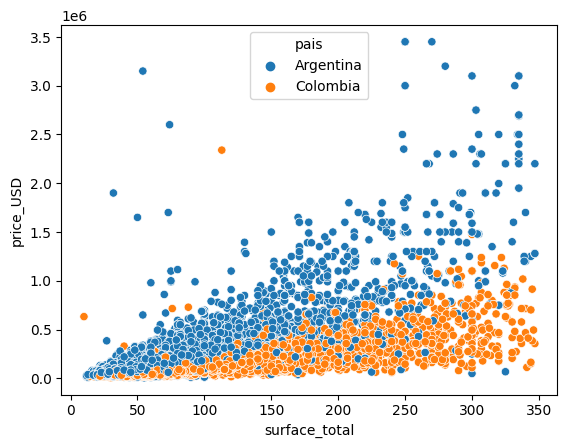

In [ ]:
#diferenciar por paises
sns.scatterplot(df, x="surface_total", y="price_USD", hue="pais")

In [ ]:
#tabla pibote
dfColombia['price_USD'] > 2000000

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price_USD
16166,Colombia,Cundinamarca,Bogotá D.C,Apartamento,3.0,3.0,3.0,113.0,2339664.0


In [ ]:
df.query("price_USD > 2000000 and pais == 'Colombia'")

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price_USD
16166,Colombia,Cundinamarca,Bogotá D.C,Apartamento,3.0,3.0,3.0,113.0,2339664.0
